# Bolsa de valores

Obtendo candlestick através de dados reais da bolsa de valores

* Utilizaremos dados do Yahoo Finance da PETR4 num intervalo de tempo específico

* Dados serão obtido através da biblioteca Pandas DataReader

Importando bibliotecas

In [98]:
from datetime import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import pandas as pd

Definindo janela de tempo

In [99]:
start = datetime(2018,1,1)
end = datetime(2020,9,1)

Obtendo dados da PETR4

In [100]:
PETR4 = web.DataReader('PETR4.SA',"yahoo",start,end)

Exibindo as cinco primeiras linhas

In [101]:
PETR4.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,16.549999,16.190001,16.190001,16.549999,33461800.0,15.353477
2018-01-03,16.719999,16.370001,16.490000,16.700001,55940900.0,15.492632
2018-01-04,16.959999,16.620001,16.780001,16.730000,37064900.0,15.520465
2018-01-05,16.860001,16.570000,16.700001,16.830000,26958200.0,15.613236
2018-01-08,17.030001,16.709999,16.740000,17.030001,28400000.0,15.798776


In [102]:
PETR4 = PETR4.reset_index()

Exibindo as cinco últimas linhas

In [103]:
PETR4.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
654,2020-08-26,22.900000,22.040001,22.780001,22.219999,69925300.0,22.219999
655,2020-08-27,22.469999,22.040001,22.320000,22.150000,35489800.0,22.150000
656,2020-08-28,22.540001,22.059999,22.250000,22.540001,31071000.0,22.540001
657,2020-08-31,22.430000,21.889999,22.320000,21.889999,48539700.0,21.889999
658,2020-09-01,0.000000,0.000000,0.000000,22.870001,0.0,22.870001


Graficando valores de abertura, fechamento, mínimo e máximo

<ipython-input-104-fb7ec848e653>:11: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<ipython-input-104-fb7ec848e653>:17: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<ipython-input-104-fb7ec848e653>:23: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning c

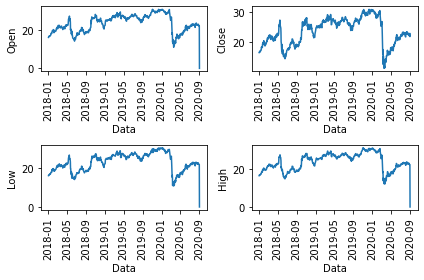

In [104]:
plt.subplot(2,2,1)
plt.plot(PETR4['Date'],PETR4['Open'])
plt.xlabel('Data')
plt.xticks(rotation=90)
plt.ylabel('Open')
plt.subplot(2,2,2)
plt.plot(PETR4['Date'],PETR4['Close'])
plt.xlabel('Data')
plt.xticks(rotation=90)
plt.ylabel('Close')
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.plot(PETR4['Date'],PETR4['Low'])
plt.xlabel('Data')
plt.xticks(rotation=90)
plt.ylabel('Low')
plt.subplot(2,2,2)
plt.subplot(2,2,4)
plt.plot(PETR4['Date'],PETR4['High'])
plt.xlabel('Data')
plt.xticks(rotation=90)
plt.ylabel('High')
plt.subplot(2,2,2)
plt.tight_layout()

In [105]:
datas = (PETR4['Date'].astype(str).apply(lambda x: x.replace("-","")).values)
datas = pd.to_datetime(data)                 

In [106]:
open = PETR4['Open'].values
high = PETR4['High'].values
low = PETR4['Low'].values
close = PETR4['Close'].values

In [109]:
fig = go.Figure(data=[go.Candlestick(x=datas,
                open=open,high=high,low=low,close=close)])
fig.update_layout(title='Exemplo de Candle Stick',yaxis_title='PETR4 Stock')
fig.show()